In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [114]:
stock_ticker = 'NVDA'   # we are fetching NVIDIA Corporation (NVDA)
data = yf.download(stock_ticker, start="2005-01-01", end="2024-11-18")

[*********************100%***********************]  1 of 1 completed


In [115]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2005-01-03 00:00:00+00:00,0.180220,0.196500,0.206000,0.195667,0.203167,1066716000
2005-01-04 00:00:00+00:00,0.171736,0.187250,0.198250,0.184250,0.197917,790224000
2005-01-05 00:00:00+00:00,0.173341,0.189000,0.191250,0.184250,0.185250,724812000
2005-01-06 00:00:00+00:00,0.171660,0.187167,0.194583,0.185833,0.192333,563568000
2005-01-07 00:00:00+00:00,0.168373,0.183583,0.189000,0.180833,0.187583,763092000


In [116]:
data.to_csv('NVDA.csv')

In [117]:
data1 = pd.read_csv('NVDA.csv')
data1.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-03 00:00:00+00:00,0.18021968007087708,0.1965000033378601,0.20600000023841858,0.19566699862480164,0.20316700637340546,1066716000
3,2005-01-04 00:00:00+00:00,0.17173606157302856,0.18725000321865082,0.19824999570846558,0.18424999713897705,0.19791699945926666,790224000
4,2005-01-05 00:00:00+00:00,0.17334100604057312,0.1889999955892563,0.1912499964237213,0.18424999713897705,0.18524999916553497,724812000


In [118]:
# skip the first two rows
df = pd.read_csv('NVDA.csv', skiprows=[1, 2])  # Skip 'Ticker' and 'Date' rows

In [119]:
df.rename(columns={'Price': 'Date'}, inplace=True)

In [120]:
# Convert 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index('Date', inplace=True)

In [121]:
df.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2005-01-03,0.180220,0.196500,0.206000,0.195667,0.203167,1066716000
2005-01-04,0.171736,0.187250,0.198250,0.184250,0.197917,790224000
2005-01-05,0.173341,0.189000,0.191250,0.184250,0.185250,724812000
2005-01-06,0.171660,0.187167,0.194583,0.185833,0.192333,563568000
2005-01-07,0.168373,0.183583,0.189000,0.180833,0.187583,763092000


In [122]:
df.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-11-11,145.259995,145.259995,148.850006,143.570007,148.679993,182325600
2024-11-12,148.289993,148.289993,149.649994,146.009995,146.779999,198634700
2024-11-13,146.270004,146.270004,149.330002,145.899994,149.070007,191903300
2024-11-14,146.759995,146.759995,149.000000,145.550003,147.639999,194463300
2024-11-15,141.979996,141.979996,145.240005,140.080002,144.869995,249120000


In [123]:
df.shape

(5003, 6)

In [124]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5.003000e+03
mean,9.812039,9.841862,10.020860,9.645839,9.840888,5.454985e+08
std,23.056424,23.051922,23.482163,22.587637,23.066169,3.219924e+08
min,0.135279,0.147500,0.159500,0.143750,0.150000,4.564400e+07
25%,0.339116,0.367750,0.373250,0.362750,0.368000,3.379760e+08
50%,0.562670,0.606000,0.617667,0.593333,0.605000,4.779880e+08
75%,6.294187,6.337625,6.444625,6.248000,6.326125,6.648860e+08
max,148.880005,148.880005,149.770004,146.259995,149.070007,3.692928e+09


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5003 entries, 2005-01-03 to 2024-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5003 non-null   float64
 1   Close      5003 non-null   float64
 2   High       5003 non-null   float64
 3   Low        5003 non-null   float64
 4   Open       5003 non-null   float64
 5   Volume     5003 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.6+ KB


In [126]:
df.isna().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing price of NVDA')

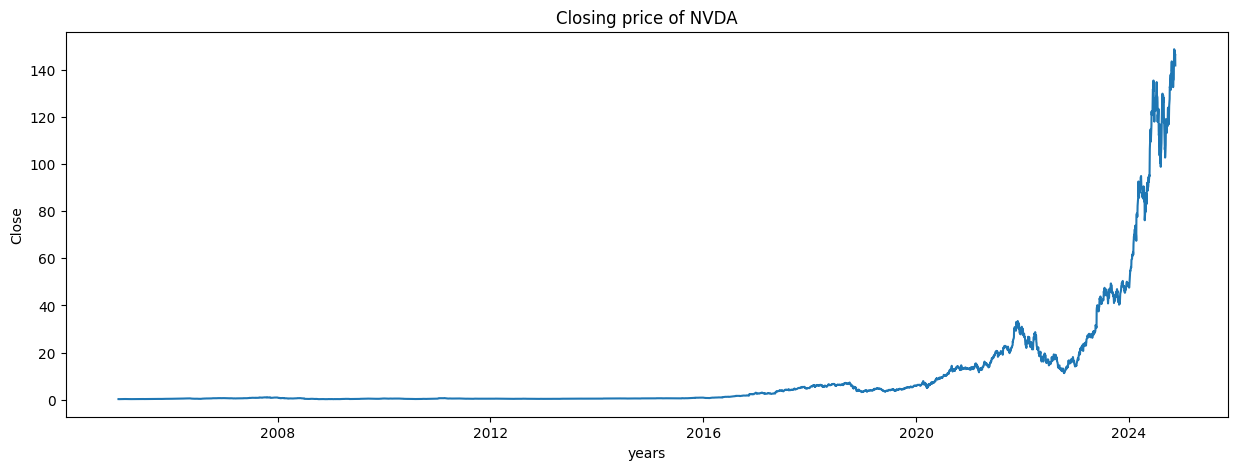

In [127]:
plt.figure(figsize = (15,5))
df['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of NVDA")

In [128]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Nvidia data")

In [129]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

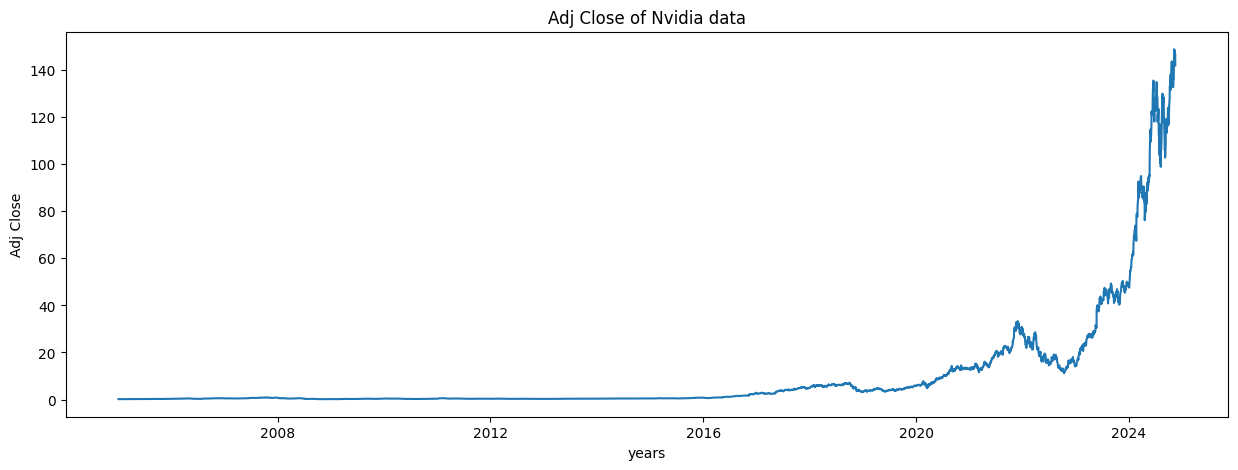

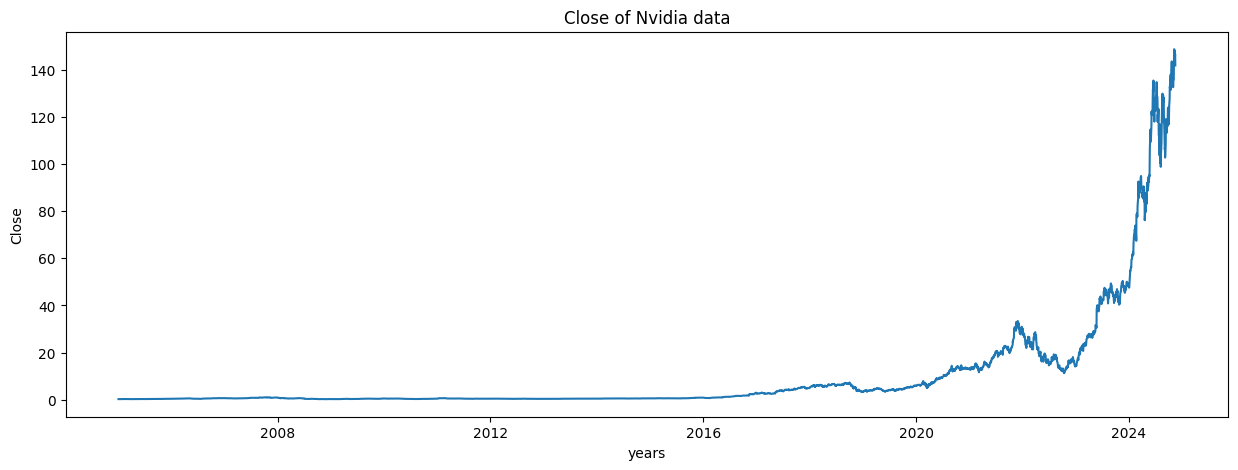

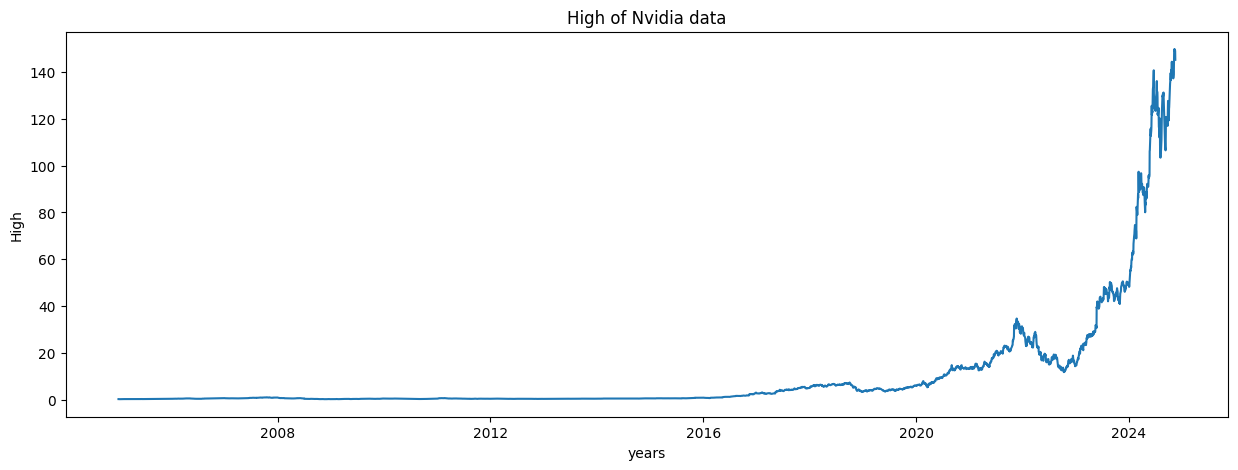

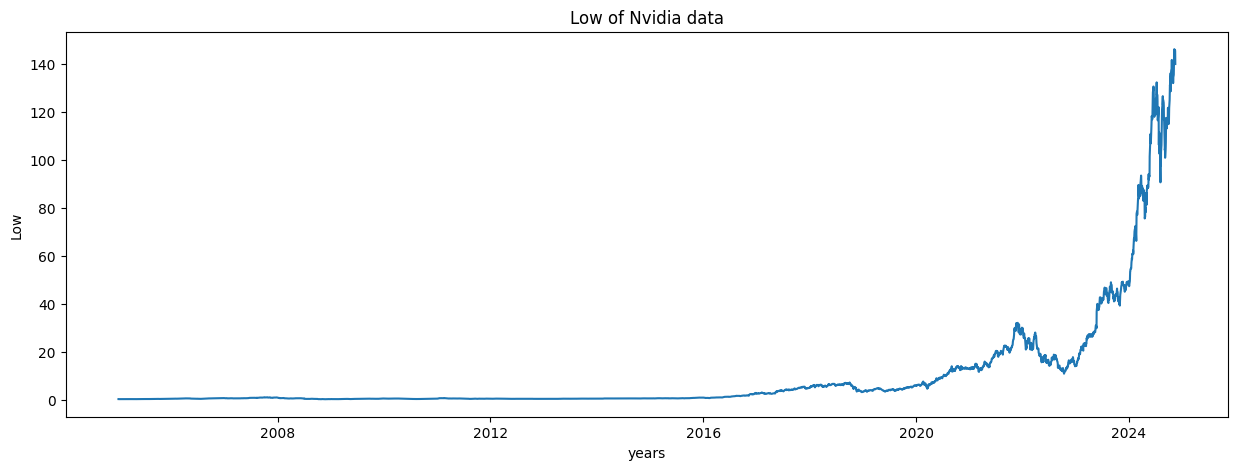

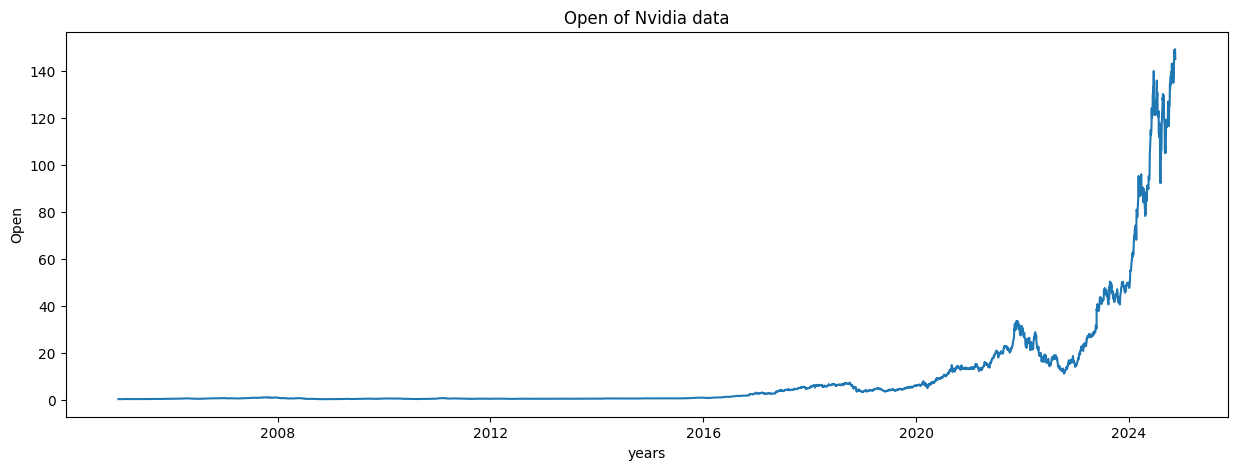

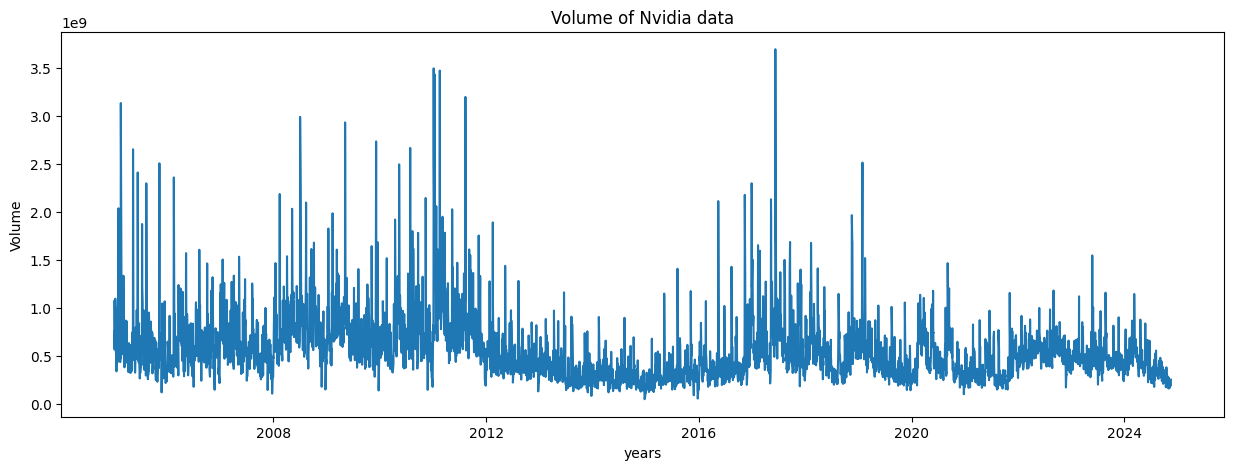

In [130]:
for column in df.columns:
    plot_graph((15,5),df[column], column)

In [131]:
df1=df.reset_index()['Close']

In [132]:
df1

0         0.196500
1         0.187250
2         0.189000
3         0.187167
4         0.183583
           ...    
4998    145.259995
4999    148.289993
5000    146.270004
5001    146.759995
5002    141.979996
Name: Close, Length: 5003, dtype: float64

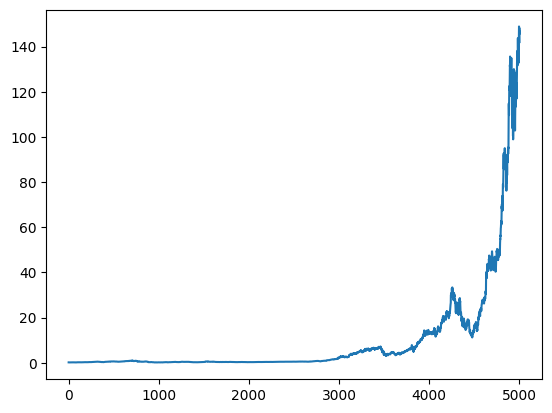

In [133]:
plt.plot(df1)

In [134]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [135]:
print(df1)

[[3.29450579e-04]
 [2.67258390e-04]
 [2.79024428e-04]
 ...
 [9.82451713e-01]
 [9.85746153e-01]
 [9.53607927e-01]]


In [136]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [137]:
training_size,test_size

(3251, 1752)

In [138]:
train_data

array([[0.00032945],
       [0.00026726],
       [0.00027902],
       ...,
       [0.03500244],
       [0.0344259 ],
       [0.03202393]])

In [142]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)



In [143]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [144]:
print(X_train.shape), print(y_train.shape)

(3150, 100)
(3150,)


(None, None)

In [145]:
print(X_test.shape), print(ytest.shape)

(1651, 100)
(1651,)


(None, None)

In [146]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [147]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\User\miniconda3\envs\stock_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 7.3277e-05 - val_loss: 0.0033
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 1.2132e-06 - val_loss: 0.0045
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - loss: 4.5362e-07 - val_loss: 0.0042
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 254ms/step - loss: 3.9165e-07 - val_loss: 0.0040
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - loss: 3.7260e-07 - val_loss: 0.0039
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 5.0236e-07 - val_loss: 0.0041
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - loss: 3.7938e-07 - val_loss: 0.0038
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 2.9738e-07 - val_loss: 0.0040
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 4.2631e-07 - val_loss: 0.0034
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 6.9124e-07 - val_loss: 0.0041
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 5.3323e-07 - val_loss:

In [150]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [151]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [152]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.1211515906207632

In [153]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

36.85876647679743

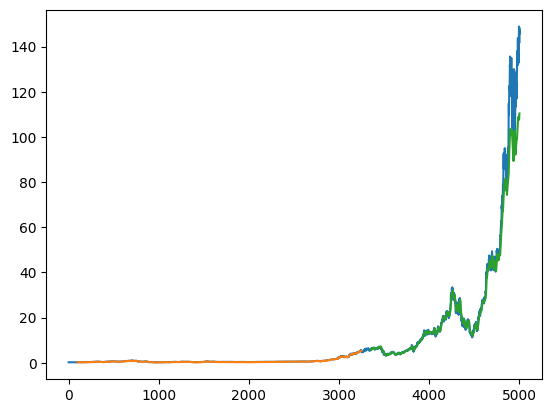

In [163]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [158]:
# Predict stock prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [186]:
predicted_prices

array([[  5.7427583],
       [  5.6889157],
       [  5.6494675],
       ...,
       [109.242905 ],
       [109.8619   ],
       [110.38406  ]], dtype=float32)

In [160]:
# Rescale the original test data for comparison
y_test_rescaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [188]:
y_test_rescaled

array([[  5.63049984],
       [  5.65824986],
       [  5.62249994],
       ...,
       [148.28999329],
       [146.27000427],
       [146.75999451]])

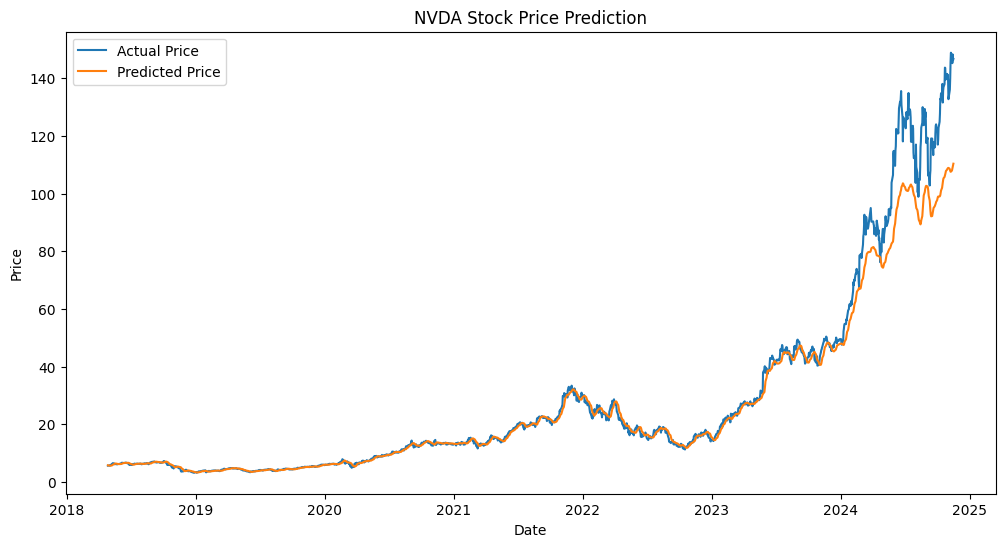

In [161]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(ytest):], y_test_rescaled, label="Actual Price")
plt.plot(data.index[-len(ytest):], predicted_prices, label="Predicted Price")
plt.title(f"{stock_ticker} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [192]:
# Assuming the 'Close' column is the one you're using for predictions
# Ensure you're using the same column for actual prices from the original data
actual_values = df['Close'].iloc[-len(y_test_rescaled):].values   # Actual 'Close' values for test data

# Create DataFrame with actual prices and predicted prices along with the dates
plotting_data = pd.DataFrame({
    'Date': df.index[-len(y_test_rescaled):],        # Dates corresponding to the test data
    'Actual Price': actual_values,                    # Actual 'Close' prices
    'Predicted Price': predicted_prices.reshape(-1)   # Predicted prices
})

# Get the most recent data by selecting the last 'len(y_test_rescaled)' rows
recent_data = plotting_data.iloc[-len(y_test_rescaled):]  # Ensure you're selecting the test data part

# Show the most recent rows (from the end, showing recent predictions and actual prices with dates)
print(recent_data)



            Date  Actual Price  Predicted Price
0     2018-04-27      5.658250         5.742758
1     2018-04-30      5.622500         5.688916
2     2018-05-01      5.678500         5.649467
3     2018-05-02      5.657750         5.623978
4     2018-05-03      5.824750         5.613833
...          ...           ...              ...
1646  2024-11-11    145.259995       108.010391
1647  2024-11-12    148.289993       108.620811
1648  2024-11-13    146.270004       109.242905
1649  2024-11-14    146.759995       109.861900
1650  2024-11-15    141.979996       110.384064

[1651 rows x 3 columns]


In [166]:
model.save('lstm_stock_model.keras')

In [164]:
len(test_data)

1752

In [167]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1411)

In [168]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [169]:
temp_input

[0.03120366890991262,
 0.030946496010747955,
 0.03005395382952793,
 0.030643938904435404,
 0.03048930045801189,
 0.030322892767137975,
 0.030687643164949673,
 0.031057433402662225,
 0.031141478824418506,
 0.030425427219879127,
 0.02894289996375163,
 0.029151328762501174,
 0.029432033738556594,
 0.02934294847689946,
 0.029800144029635527,
 0.029769888960205278,
 0.02923873407752469,
 0.028105828081491254,
 0.028241977496929895,
 0.02761501115404765,
 0.027384733431046,
 0.02564167177948409,
 0.026245104442473067,
 0.025831609944246246,
 0.025934141190982373,
 0.02531894409255053,
 0.024515488775990153,
 0.02507185568219511,
 0.02459112805256829,
 0.023770863651656655,
 0.023406114856847474,
 0.023100196254265168,
 0.022597616494381214,
 0.0223908692452678,
 0.021777350490467064,
 0.021494965567778024,
 0.023044727558308033,
 0.022755618040076985,
 0.023175835530843302,
 0.023464945049074353,
 0.023957440320149063,
 0.02434740113848262,
 0.02358260543352812,
 0.02392886519735243,
 0.0233

In [174]:
len(temp_input)

1411

In [171]:
print(x_input.shape)


(1, 1410)


In [181]:
n_steps = 100  # Number of time steps for prediction
forecast_days = 30  # Number of days to predict

# Initialize the list to store forecasted values
forecast_values = []

# Prepare the initial input (last n_steps from temp_input)
temp_input_for_forecast = list(temp_input[-n_steps:])  # Use the last `n_steps` values for the forecast

# Generate prediction for the next 30 days
for i in range(forecast_days):
    x_input = np.array(temp_input_for_forecast[-n_steps:])  # Slice the last n_steps elements
    x_input = x_input.reshape((1, n_steps, 1))  # Reshape for prediction
    yhat = model.predict(x_input, verbose=0)  # Predict the next value
    forecast_values.append(yhat[0])  # Append the predicted value to the forecast list
    temp_input_for_forecast.extend(yhat[0].tolist())  # Add the predicted value to the input for the next prediction

# Rescale forecast values if necessary (if using a scaler)
forecast_values_rescaled = scaler.inverse_transform(forecast_values)  # Adjust if you have a scaler

# Print the forecasted values for the next 30 days
print("Forecasted prices for the next 30 days:")
print(forecast_values_rescaled)

Forecasted prices for the next 30 days:
[[35.99940898]
 [35.93286053]
 [35.86706118]
 [35.80199543]
 [35.73767213]
 [35.67405583]
 [35.61115317]
 [35.54893091]
 [35.48740013]
 [35.42654532]
 [35.36634653]
 [35.30680377]
 [35.24789929]
 [35.18963089]
 [35.13198526]
 [35.0749469 ]
 [35.01852023]
 [34.96268531]
 [34.90743106]
 [34.85277299]
 [34.79867121]
 [34.7451235 ]
 [34.69213872]
 [34.63969694]
 [34.58778928]
 [34.53641796]
 [34.48556082]
 [34.43521787]
 [34.3853913 ]
 [34.33605897]]
